In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
def collapseBlanks(original_path, saving_path):
    
    with open(original_path, 'r') as file :
         lines = file.readlines()
    
    for i, line in enumerate(lines):
        collapsed = ' '.join(line.split())
        lines[i] = lines[i].replace(line, collapsed)
        
    with open(saving_path, 'w') as file :
        for i in range(len(lines)-1):
            file.write(lines[i+1]+'\n')

In [3]:
collapseBlanks("./Anno/original/list_attr_img.txt", "./Anno/changed/list_attr_img.txt")
collapseBlanks("./Anno/original/list_attr_cloth.txt", "./Anno/changed/list_attr_cloth.txt")

with open("./Anno/changed/list_attr_cloth.txt", 'r') as file :
    filedata = file.read()
filedata = filedata.replace('attribute_type', ',attribute_type')
for attribute_type in range(1,6):
    filedata = filedata.replace(str(attribute_type), ','+str(attribute_type))

with open("./Anno/changed/list_attr_cloth.txt", 'w') as file :
    file.write(filedata)

In [4]:
collapseBlanks("./Anno/original/list_category_cloth.txt", "./Anno/changed/list_category_cloth.txt")
collapseBlanks("./Anno/original/list_category_img.txt", "./Anno/changed/list_category_img.txt")

In [5]:
df_attr_img = pd.read_csv('./Anno/changed/list_attr_img.txt', header = None, skiprows=1, sep = ' ')

In [6]:
df_attr_cloth = pd.read_csv('./Anno/changed/list_attr_cloth.txt', sep = ',') 

In [7]:
df_category_cloth = pd.read_csv('./Anno/changed/list_category_cloth.txt', sep = ' ') #,index_col='category_name'

In [8]:
df_category_img = pd.read_csv('./Anno/changed/list_category_img.txt',sep = ' ') #, index_col='image_name'

In [9]:
df_category_cloth.insert(0, 'category_label', range(1, len(df_category_cloth)+1))

In [10]:
df_category_cloth.head()

,category_label,category_name,category_type
0,1,Anorak,1
1,2,Blazer,1
2,3,Blouse,1
3,4,Bomber,1
4,5,Button-Down,1


In [11]:
df_category_img.head()

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3


In [12]:
df_category_combined = pd.merge(df_category_cloth, df_category_img)

In [13]:
df_category_combined.head()

,category_label,category_name,category_type,image_name
0,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000001.jpg
1,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000002.jpg
2,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000003.jpg
3,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000004.jpg
4,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000005.jpg


In [14]:
file_name = "category_combined.csv"
df_category_combined.to_csv("./Anno/changed/"+file_name, index=None)

In [15]:
df_attr_img.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [16]:
df_attr_img[[i for i in range(1, 1001)]] = df_attr_img.drop(columns = [0]).fillna(0.0).astype(np.int64)

In [17]:
df_attr_img.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [18]:
df_attr_img.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289222 entries, 0 to 289221
Data columns (total 1001 columns):
0       object
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24      int64
25      int64
26      int64
27      int64
28      int64
29      int64
30      int64
31      int64
32      int64
33      int64
34      int64
35      int64
36      int64
37      int64
38      int64
39      int64
40      int64
41      int64
42      int64
43      int64
44      int64
45      int64
46      int64
47      int64
48      int64
49      int64
50      int64
51      int64
52      int64
53      int64
54      int64
55      int64
56      int64
57      int64
58      int64
59      int64
60      int64
61      int64
62      int64
63  

In [19]:
df_attr_cloth.head()

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1


In [20]:
df_attr_cloth.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
attribute_name     1000 non-null object
attribute_type     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [21]:
attr_img_col = df_attr_cloth['attribute_name ']

In [22]:
attr_img_col = pd.Series(['image_name']).append(attr_img_col,ignore_index=True)

In [23]:
df_attr_img.columns = attr_img_col

In [73]:
df_attr_combined= df_attr_img

In [74]:
df_attr_combined.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [26]:
file_name = "attr_combined.csv"
df_attr_combined.to_csv("./Anno/changed/"+file_name, index=None)

## groupby attribute types

In [27]:
df_attr_cloth.groupby(df_attr_cloth.attribute_type).size()

attribute_type
1    156
2    218
3    180
4    216
5    230
dtype: int64

In [41]:
def df_attr_type(attr_type, i):

    df_attr_type = ('df_attr_'+attr_type)
    lst_attr_type = ('lst_attr_'+attr_type)
    attr_type_frequency = (attr_type+'_frequency')
    attr_type_frequency_sort = (attr_type+'_frequency_sort')
        
    df_attr_type = df_attr_cloth[(df_attr_cloth.attribute_type == i)]
        
    lst_attr_type = ['image_name']+ (df_attr_type['attribute_name '].values.tolist())
    df_attr_type = pd.DataFrame(df_attr_img, columns=lst_attr_type)
    attr_type_frequency = (df_attr_type.iloc[:,1:] == 1).sum(axis=0)
    attr_type_frequency_sort = attr_type_frequency.sort_values(ascending = False)

        
    return df_attr_type, lst_attr_type, attr_type_frequency, attr_type_frequency_sort
        

In [42]:
df_attr_texture, lst_attr_texture, attr_texture_frequency, attr_texture_frequency_sort = df_attr_type('texture', 1)
df_attr_fabric, lst_attr_fabric, attr_fabric_frequency, attr_fabric_frequency_sort = df_attr_type('fabric', 2)
df_attr_shape, lst_attr_shape, attr_shape_frequency, attr_shape_frequency_sort = df_attr_type('shape', 3)
df_attr_part, lst_attr_part, attr_part_frequency, attr_part_frequency_sort = df_attr_type('part', 4)
df_attr_style, lst_attr_style, attr_style_frequency, attr_style_frequency_sort = df_attr_type('style', 5)

### make csv file for each type

In [62]:
df_attr_texture.to_csv("./Anno/changed/attr_texture.csv", index=None)
df_attr_fabric.to_csv("./Anno/changed/attr_fabric.csv", index=None)
df_attr_shape.to_csv("./Anno/changed/attr_shape.csv", index=None)
df_attr_part.to_csv("./Anno/changed/attr_part.csv", index=None)
df_attr_style.to_csv("./Anno/changed/attr_style.csv", index=None)

### texture

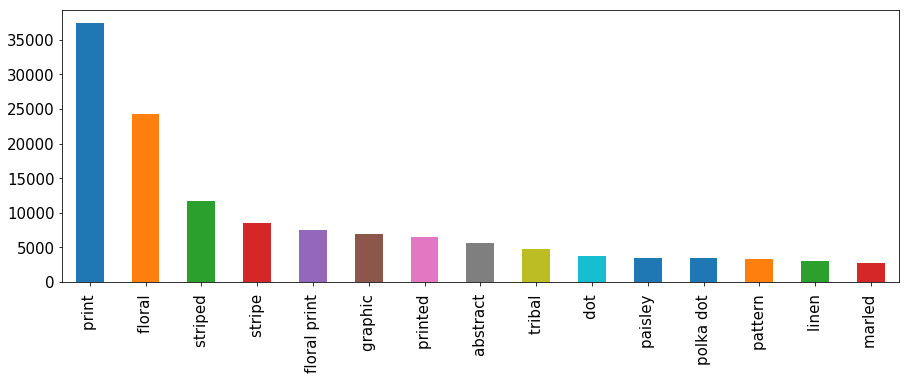

In [63]:
attr_texture_frequency_sort[:15].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

### fabric

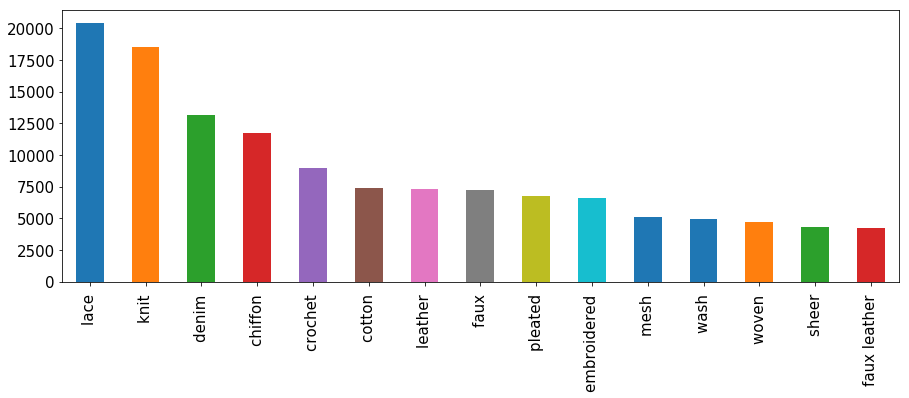

In [64]:
attr_fabric_frequency_sort[:15].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

### shape

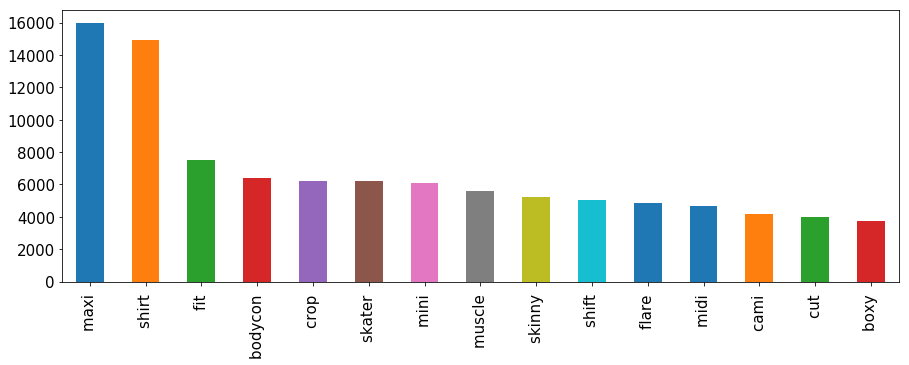

In [65]:
attr_shape_frequency_sort[:15].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

### part

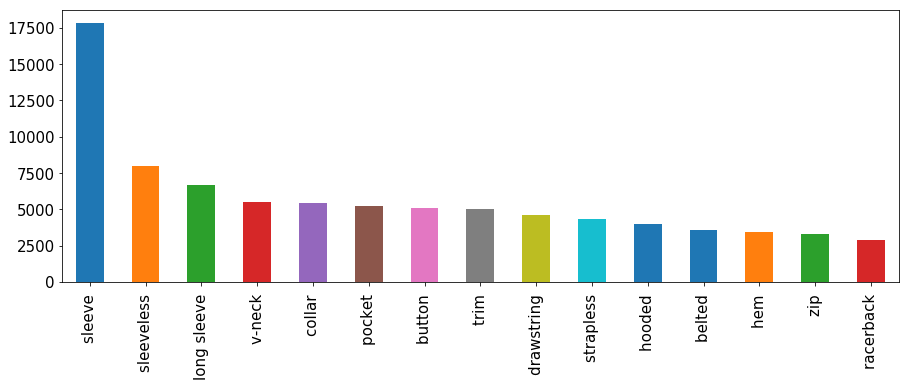

In [66]:
attr_part_frequency_sort[:15].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

### style

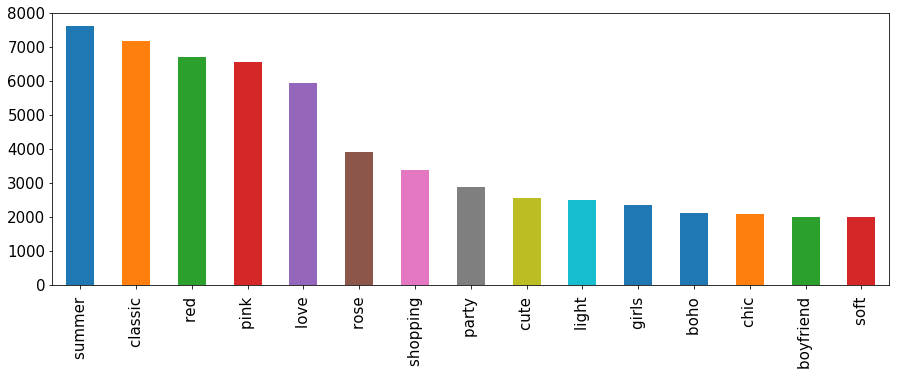

In [67]:
attr_style_frequency_sort[:15].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

## combine attributes and category

In [69]:
df_attr_img.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [76]:
df_attr_category_combined = pd.merge(df_attr_combined, df_category_combined)

In [77]:
file_name = "attr_category_combined.csv"
df_attr_category_combined.to_csv("./Anno/changed/"+file_name, index=None)